In [140]:
import numpy as np
from matplotlib import pyplot as plt

## binomial distribution study
Consider the case of a coin flip.  there is a 50% probability of getting a "heads" on each coinflip.

you might ask, what's the likelihood of getting a heads on 1 flip: respnse 50%.  What if you did 4 flips? - you wouldn't expect exactly 2 heads and 2 tails, in fact, you might get all heads. but if you did another series of 4, you probably wouldn't get all heads again, in fact doing it 10 times, 100% heads may be infrequent...

a binomial distribution models this concept, by letting you set the number of experiments, n=4 in this case and and repeat it size=2 or 10 for the example above.

```
np.random.binomial(n, p, size=q) where
n=4 -  number of coins to flip
p=0.5 - likelihood of getting heads for each coin 
size=2 - number of times flip all 4 coins
```

> If you divide the np.array by the value of 'n' it converts the value to a proportion of times a result was acheived.  You can then compare this to the probability you expected, i.e, p. In other words, instead of getting "3" heads of the 4 coins, when you divide by n, you get 0.75

In [141]:
n=4
p=0.5
repeats=10
# run a test of the coinflip experiments
test1 = np.random.binomial(n, p, size=repeats)
test1p = test1 / float(n) #use float() to get non-integer response

print("number of times the coinflip was \'heads\' of 4 flips")
print(test1)
print("expressed in proportion of times it's heads is: ")
print(test1p)

number of times the coinflip was 'heads' of 4 flips
[2 3 1 2 3 1 2 3 3 3]
expressed in proportion of times it's heads is: 
[ 0.5   0.75  0.25  0.5   0.75  0.25  0.5   0.75  0.75  0.75]


in how many of these repeats did you actually get what you expected, in other words, when is the observed test equal to p?

In [142]:
test1percentp = np.mean(test1p == 0.5) * 100
print("when flipping {nc} coins {reps} times, we only observed {pp}% heads".\
      format(reps=repeats, nc=n, pp=p * 100))
print("{}% of the time".format(test1percentp))


when flipping 4 coins 10 times, we only observed 50.0% heads
30.0% of the time


## What happens when you increase the number of repeat cycles (size)

In [143]:
for i in range(1,10):
    #make size bigger faster so we can see the impact of growing size
    testsize= i * 100 
    increase_size_test = np.random.binomial(n, p, size=testsize)/n
    print("upon fliping 4 coins {0} times, we got exactly 50% heads {1:.1f}% of the time".\
         format(testsize,np.mean(increase_size_test == 0.5)*100))


upon fliping 4 coins 100 times, we got exactly 50% heads 46.0% of the time
upon fliping 4 coins 200 times, we got exactly 50% heads 46.0% of the time
upon fliping 4 coins 300 times, we got exactly 50% heads 31.7% of the time
upon fliping 4 coins 400 times, we got exactly 50% heads 36.8% of the time
upon fliping 4 coins 500 times, we got exactly 50% heads 40.6% of the time
upon fliping 4 coins 600 times, we got exactly 50% heads 38.2% of the time
upon fliping 4 coins 700 times, we got exactly 50% heads 40.3% of the time
upon fliping 4 coins 800 times, we got exactly 50% heads 38.5% of the time
upon fliping 4 coins 900 times, we got exactly 50% heads 35.9% of the time


No matter how many times you flip 4 coins, the likelihood of getting your expected p (exactly 50%) is low, it seems to happen around 1/3 of the time.

## what if we increase the number of experiments (n) in a cycle?

In [144]:
for i in range(1,10):
    #make n bigger faster so we can see the impact of growing size
    ntest= i * 100 
    increase_n_test = np.random.binomial(ntest, p, size=1000)/ntest
    print("upon flipping {0} coins 1,000 times, we got exactly 50% heads {1:.1f}% of the time".\
         format(ntest, np.mean(increase_n_test == 0.5)*100))
   

upon flipping 100 coins 1,000 times, we got exactly 50% heads 6.0% of the time
upon flipping 200 coins 1,000 times, we got exactly 50% heads 5.8% of the time
upon flipping 300 coins 1,000 times, we got exactly 50% heads 5.2% of the time
upon flipping 400 coins 1,000 times, we got exactly 50% heads 4.1% of the time
upon flipping 500 coins 1,000 times, we got exactly 50% heads 3.3% of the time
upon flipping 600 coins 1,000 times, we got exactly 50% heads 2.9% of the time
upon flipping 700 coins 1,000 times, we got exactly 50% heads 2.3% of the time
upon flipping 800 coins 1,000 times, we got exactly 50% heads 3.2% of the time
upon flipping 900 coins 1,000 times, we got exactly 50% heads 2.5% of the time


getting exactly 50% Heads turns out to be really unlikely.  probably should look at a histogram of each approach. to see the distribution around the expected p.

## Histogram of increasing number of  repeats


size:100 %cases exactly 50% heads: 41.0%
size:400 %cases exactly 50% heads: 39.2%
size:800 %cases exactly 50% heads: 33.8%
size:1000 %cases exactly 50% heads: 38.7%


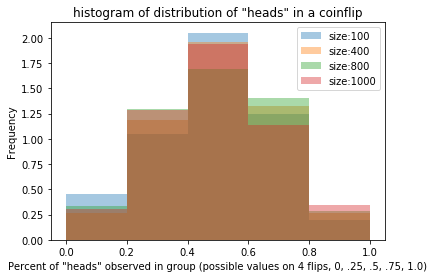

possible values are each (0-n)/n, in this case 0/4, 1/4,..., 4/4


In [145]:
def increase_repeats(cycles):
    # create a binomial distribution for coinflips where you 
    # flip a 4 coins several times, based on function input
    p=0.5
    n=4
    dist = np.random.binomial(n, p, cycles) / float(n)
    return dist

# we want a common histogram...
def histplot(cycles):
    histseries = increase_repeats(cycles)
    histlabel = "size:"+str(cycles)
    plt.hist(histseries, normed=True, alpha=0.4, bins=5, label=histlabel)
    # interquartile range calculations
    first_quarter = np.percentile(histseries, 25)
    third_quarter = np.percentile(histseries, 75)
    print(histlabel, "%cases exactly 50% heads: {0:.1f}%".format(np.mean(histseries == 0.5)*100))

histplot(100)
histplot(400)
histplot(800)
histplot(1000)

plt.title('histogram of distribution of "heads" in a coinflip')
plt.xlabel('Percent of "heads" observed in group (possible values on 4 flips, 0, .25, .5, .75, 1.0)')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print("possible values are each (0-n)/n, in this case 0/4, 1/4,..., 4/4")

The shape of the historgram is largely the same in each case. with strong centrality around 50%, but wide distribution, and fairly high frequency of the outliers because n is small...

## Histogram of increasing number of flips in each cycle (increasing n)

-flipping 4 coins 1,000 times, get Half heads 36.8% of the time, with interquartile range of 50.0%
-flipping 20 coins 1,000 times, get Half heads 19.7% of the time, with interquartile range of 15.0%
-flipping 80 coins 1,000 times, get Half heads 7.4% of the time, with interquartile range of 7.5%
-flipping 1000 coins 1,000 times, get Half heads 2.6% of the time, with interquartile range of 2.1%


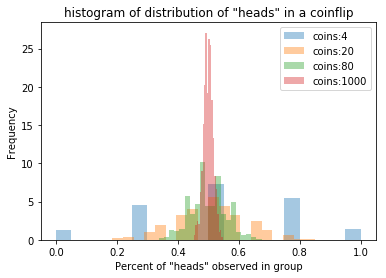

In [146]:
def increase_flips(flips):
    # create a binomial distribution for coinflips where you 
    # flip a x coins 1000 times, based on function input
    p=0.5
    n=flips
    cycles=1000
    dist = np.random.binomial(n, p, cycles) / float(n)
    return dist

# we want a common histogram...
def histplot(flips):
    histseries = increase_flips(flips)
    histlabel = "coins:"+str(flips)
    plt.hist(histseries, normed=True, alpha=0.4, bins=20, label=histlabel)
    # interquartile range calculations
    first_quarter = np.percentile(histseries, 25)
    third_quarter = np.percentile(histseries, 75)
    print("-flipping {nc} coins 1,000 times, get Half heads {np:.1f}% of the time, with interquartile range of {iq:.1f}%".\
         format(np=np.mean(histseries == 0.5)*100, nc=flips, iq=((third_quarter - first_quarter)*100)))
    

histplot(4)
histplot(20)
histplot(80)
histplot(1000)

plt.title('histogram of distribution of "heads" in a coinflip')
plt.xlabel('Percent of "heads" observed in group')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Even though the percent of times we see exactly 50% heads reduces, the cluster around the expected value of p (0.5) tightens as the number of attempts in the series grows.

Notice how the interquartile reduces to centrality as n increases...